In [1]:
from read_mem import *
import matplotlib.pyplot as plt
import pathlib
from parse import parse
from scipy.optimize import curve_fit

In [2]:
def func(x, a, b,):

    return a * x + b

Total number of log files 13
/home/bastian/D1/registration/mrislurm/438008.out
-- srun: error: n003: task 115: Killed

438008 linear slope= 1.6334446840157384
/home/bastian/D1/registration/mrislurm/438009.out
-- srun: error: n004: task 49: Killed

438009 linear slope= 1.6759834937328286
/home/bastian/D1/registration/mrislurm/437866.out
-- slurmstepd: error: *** JOB 437866 ON h001 CANCELLED AT 2023-02-01T18:41:40 ***

437866 linear slope= 1.5419565175781245
/home/bastian/D1/registration/mrislurm/438502.out
-- srun: error: n003: task 1: Killed

438502 linear slope= 0.9422221642020977
/home/bastian/D1/registration/mrislurm/438462.out
-- srun: error: n001: task 21: Killed

438462 linear slope= 0.9027257517326874
438887 linear slope= 0.90113835717541
/home/bastian/D1/registration/mrislurm/439198.out
-- srun: error: n013: task 5: Killed

439198 linear slope= 0.869037894865786
439204 linear slope= 0.8684299055791727
/home/bastian/D1/registration/mrislurm/439552.out
-- srun: error: n013: task 

/home/bastian/.conda/envs/mri_inverse/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


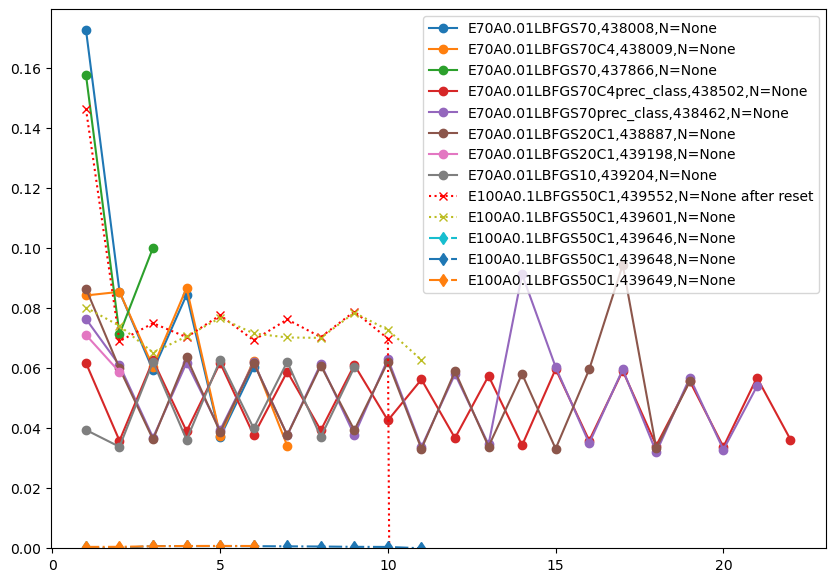

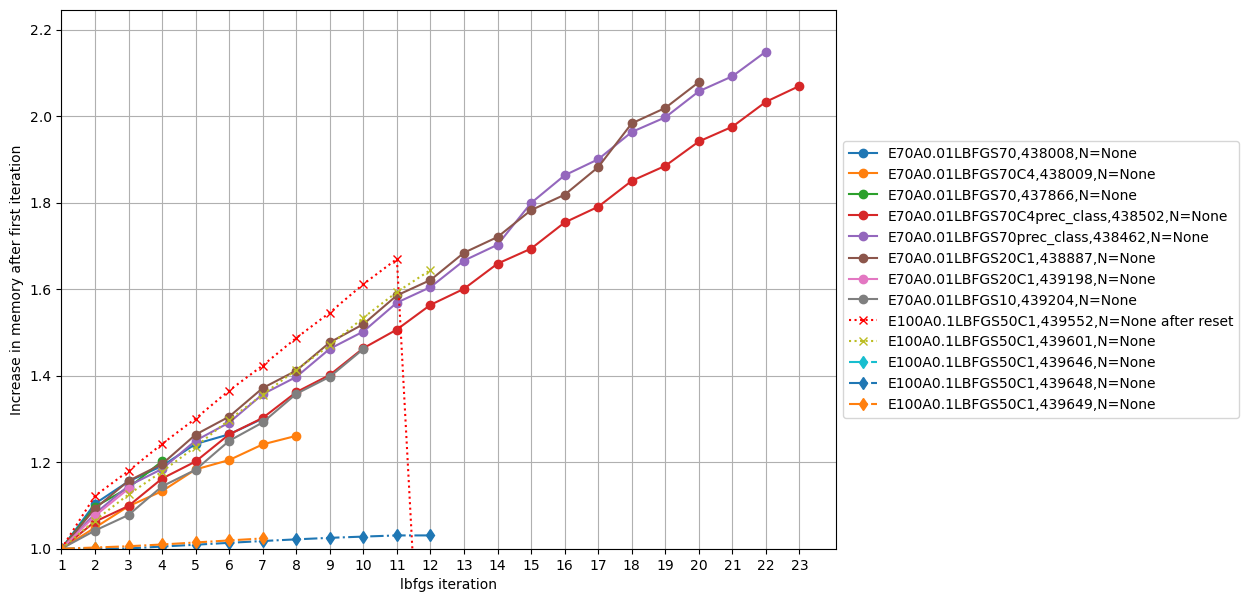

In [4]:
# filenames = ["/home/bastian/D1/registration/mrislurm/436844_log_python_srun.txt"]


# path = pathlib.Path("/home/bastian/D1/registration/cubeslurm/")
# # slurmids = list(range(437522, 437526))
# # slurmids = list(range(437534, 437543))
# # slurmids.remove(437537)
# slurmids = list(range(437543, 437559))
# slurmids.remove(437547)

# slurmids += list(range(437573, 437576))
# slurmids += list(range(437579, 437585))
# slurmids += list(range(437579, 437588))
# slurmids += list(range(437590, 437591))

# slurmids.remove(437585)
# slurmids.remove(437586)

# slurmids = set(slurmids)

# slurmids = [# 437606, 
#             437649, 437650, 437653, 437657, 437707, 437711, 437712]

# slurmids = [437738, 437739, 437740, 437762, 437768,437771,]

slurmids=[]
path = pathlib.Path("/home/bastian/D1/registration/mrislurm/")
slurmids = [# 437776, 437782, 437847, 
            # 437912, 437913, 437915,437918,437919,437920,437921,
            #437783, 437866
            438008, 438009, # 438153, 
            437866, # is the job on habaq
            438502, 438462,
            438887, # is the job with no resacling
            439198, # is the job on milanq
            439204, # is the restart job
            439552, 439601,
            439646, 439648,439649
            ]

# path = pathlib.Path("/home/bastian/D1/registration/cubeslurm/")
# # slurmids = [
# #             # 438207, 438208, 438210, 438211, 438212, 438214, 438215, 438216,
# #             # 438217, 438218, 438219, 438220, 438224,
# #             # 438294,438293, 438296, 438299, 438301,  438302, 438304, 438306, 438307, 438308,
# #             # 439209, 439210, 439213, 439214, 439215, 439217, 439293
# #             ]


# slurmids += list(range(439294, 439306))

# slurmids += list(range(439312, 439316))

# slurmids += list(range(439316, 439319))

mem0 = []


print("Total number of log files", len(slurmids))

fig2 = plt.figure(figsize=(10,7))
ax2 = plt.subplot(111)

fig = plt.figure(figsize=(10,7))
ax = plt.subplot(111)

colors = {1: "darkblue", 2: "blue", 4:"deepskyblue", 8:"slategrey", 10: "k"}

for slurmid in slurmids:

    filename = path / (str(slurmid) + "_log_python_srun.txt")

    mema, outfoldername, line_searches = read_memory(filename)
    check_for_error(path / (str(slurmid) + ".out"))
    check(filename)#path / (str(slurmid) + ".out"))

    ntasks = None
    ntasks, maxcor, meshn = read(path / (str(slurmid) + ".out"))

    outfoldername = outfoldername.replace("\n", "").replace(" ", "")
    
    # print(filename, outfoldername, line_searches)
    
    try:
        mema[:,0]
        # print(mema[:, 0])
    except IndexError:
        print(outfoldername, "probably still running init? Continue.")
        continue

    marker = "o"
    linestyle = "-"


    ###########################################################################################
    #### Factor
    fac = 1
    fac = mema[0,1]
    ###########################################################################################


    popt, pcov = curve_fit(func, mema[:,0], mema[:,1])
    print(slurmid, "linear slope=", popt[1])

    label = outfoldername + "," + str(slurmid) + ",N=" + str(ntasks)

    if ntasks is not None:
        label += str(ntasks).replace("\n", "")

    color = None

    if slurmid >= 439294:
        linestyle = ":"
        marker = "x"

    if "copy_transform" in label:
        linestyle = "-"
        marker = "s"

    if "copy_preconditioning" in label:
        linestyle = "-"
        marker = "o"
    if "nosmoothen" in label:
        linestyle = "-"
        marker="*"

    if "nocopy" in label:
        linestyle = ":"
        marker="p"

    if slurmid == 439551 or 439552 == slurmid:
        label += " after reset"
        color = "red"

    if slurmid >= 439646:
        marker = "d"
        linestyle = "-."

    if 1.5 in mema[:, 0]:
        mema = mema[::2, :]

    # print(slurmid, (mema[1:, 1] - mema[:-1,1]))

    line = plt.plot(mema[:,0], mema[:,1] / fac, marker=marker, linestyle=linestyle, color=color,
            label=label,
            )

    color = line[-1].get_color()
    ax2.plot(mema[:-1,0], mema[1:,1] - mema[:-1,1], marker=marker, linestyle=linestyle, color=color, label=label,)
    
    # for key, item in line_searches.items():
    #     ax2.plot(key, item, marker="o", color=color, markersize=20)

    ax2.legend()
    ax2.set_ylim(0, None)
    mem0.append(mema[-1,1] / mema[0,1])

plt.xlabel("lbfgs iteration")
if fac == 1:
    plt.ylabel("memory (TB)")
else:
    ax.set_ylim(1, None)
    plt.ylabel("Increase in memory after first iteration")
plt.xlim(1, None)
plt.xticks(list(range(1, int(plt.gca().get_xlim()[1]))))
plt.grid()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()